In [1]:
import pandas as pd
import numpy as np
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [2]:
def check(df):
    # Проверка данных на валидность
    for column in df.columns:
        print(f"{column}: {X[column].sum()}; ")

In [3]:
data_dir = "/home/user/dev/dataScience/titanic/data/"
df = pd.read_csv (data_dir + 'gender_submission.csv')
test = pd.read_csv (data_dir + 'test.csv')
train = pd.read_csv (data_dir + 'train.csv')

In [4]:
# Анализ датасета

#Первые несколько строк
train.head()
# Информация о датасете
train.info()
# Описательная статистика
train.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

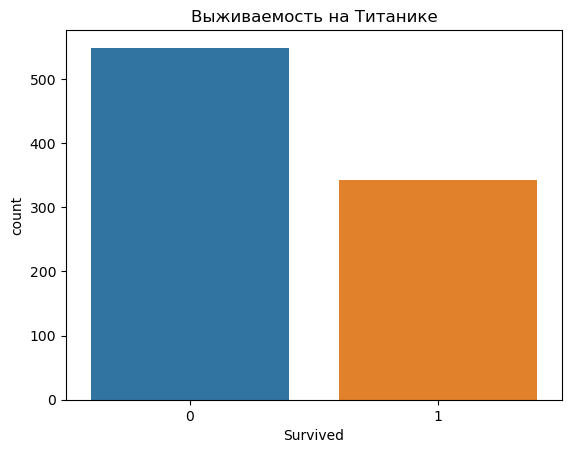

In [5]:
# Построение гистограммы выживших и погибших
sns.countplot(x='Survived', data=train)
plt.title('Выживаемость на Титанике')
plt.show()

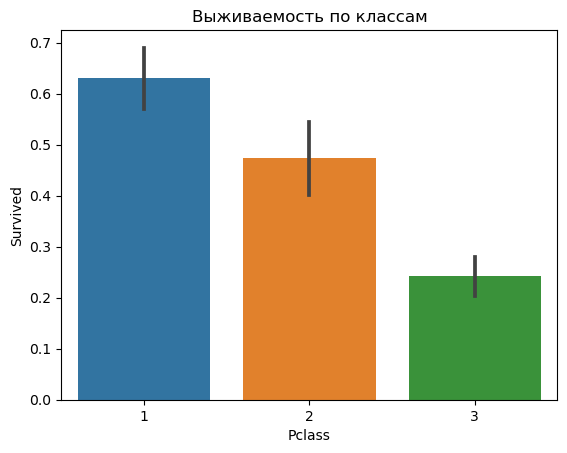

In [6]:
# Построение гистограммы по классам
sns.barplot(x='Pclass', y='Survived', data=train)
plt.title('Выживаемость по классам')
plt.show()

/tmp/ipykernel_7201/3630563121.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = train.corr()


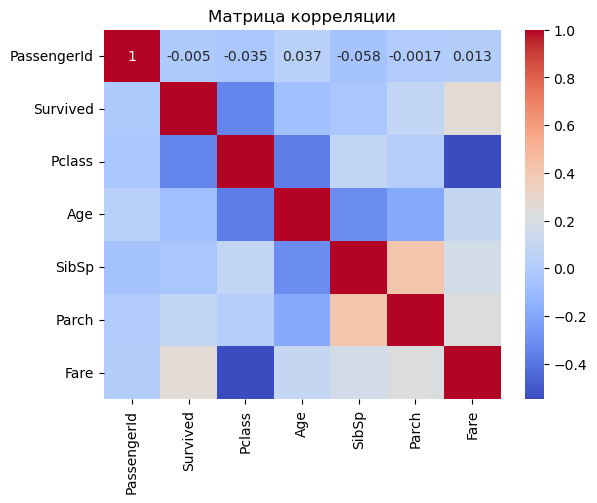

In [21]:
# Построение матрицы корреляции
corr_matrix = train.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Матрица корреляции')
plt.show()

# Матрица показывает, что явной корреляции между элементами не имеется.

In [26]:
# t-test

from scipy.stats import ttest_ind

group1 = train[train['Pclass'] == 1]['Survived']
group2 = train[train['Pclass'] == 2]['Survived']

t_stat, p_value = ttest_ind(group1, group2)
print(f'T-статистика: {t_stat}, p-значение: {p_value}')

T-статистика: 3.178614052332485, p-значение: 0.0015954656668372637


In [28]:
# Хи-квадрат

from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(train['Pclass'], train['Survived'])

chi2_stat, p_value, _, _ = chi2_contingency(contingency_table)
print(f'Хи-квадрат статистика: {chi2_stat}, p-значение: {p_value}')

Хи-квадрат статистика: 102.88898875696056, p-значение: 4.549251711298793e-23


In [31]:
# ANOVA

from scipy.stats import f_oneway

class1 = train[train['Pclass'] == 1]['Survived']
class2 = train[train['Pclass'] == 2]['Survived']
class3 = train[train['Pclass'] == 3]['Survived']

f_stat, p_value = f_oneway(class1, class2, class3)
print(f'F-статистика: {f_stat}, p-значение: {p_value}')

F-статистика: 57.964817590910116, p-значение: 2.1832474151179777e-24


In [24]:
# Проверка пропущенных значений
train.isnull().sum()

# Обработка пропущенных значений (например, заполнение средними значениями)
train['Age'].fillna(train['Age'].mean(), inplace=True)

In [7]:
# Выделение целевой колонки и колонки параметров
columns_target = ['Survived']
columns_train = ['Pclass', 'Sex', 'Age', 'Fare']

In [8]:
# Получается красиво, прям как на той теории
X = train[columns_train]
Y = train[columns_target]

In [9]:
# Проверка данных на валидность
for column in columns_train:
    print(f"{column}: {X[column].isnull().sum()}; ")

Pclass: 0; 
Sex: 0; 
Age: 177; 
Fare: 0; 


In [10]:
# Корректировка данных

# Заметили, что у Age много пустых значений, но удалить эти записи может быть не совсем правильным
# ибо это может повлиять на выборку, поэтому мы просто заполним их медианными значениями по возрасту

X['Age'] = X['Age'].fillna(X['Age'].median())

/tmp/ipykernel_7201/4142239557.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Age'] = X['Age'].fillna(X['Age'].median())


In [11]:
# Проверка данных на валидность
for column in columns_train:
    print(f"{column}: {X[column].isnull().sum()}; ")

Pclass: 0; 
Sex: 0; 
Age: 0; 
Fare: 0; 


In [12]:
# Корректировка данных (замена значений категориальных значений числовыми вместо строк)
d={'male':1, 'female':0}
X['Sex'] = X['Sex'].apply(lambda x:d[x])

/tmp/ipykernel_7201/4159695936.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Sex'] = X['Sex'].apply(lambda x:d[x])


In [13]:
# Разделение выборки на обучающую и тестовую
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42, shuffle=False)

In [14]:
check(X_train)
check(X_test)

Pclass: 2057; 
Sex: 577; 
Age: 26161.17; 
Fare: 28693.9493; 
Pclass: 2057; 
Sex: 577; 
Age: 26161.17; 
Fare: 28693.9493; 


In [15]:
from sklearn import svm
predmodel = svm.LinearSVC()
predmodel.fit(X_train, Y_train)

/usr/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/usr/lib/python3.11/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC()

In [16]:
# Проверяем точность предсказаний
predmodel.score(X_test, Y_test)

0.6779661016949152